# Limpeza e tratamento de dados com R

## ingestao de dados

In [1]:
# importando dados
dados = read.csv('../data/Churn.csv', sep =';', na.strings ='', stringsAsFactors = T)

# na.strings='' preenche valores vazios como NA
# stringsAsFactors=T fatores são dados categoricos

## exploração

In [2]:
# visualizando dados
head(dados)

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,1,619,RS,Feminino,42,2,0,1,1,1,10134888,1
2,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258,0
3,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157,1
4,4,699,RS,Feminino,39,1,0,2,0,0,9382663,0
5,5,850,SC,Feminino,43,2,12551082,1,1,1,790841,0
6,6,645,SC,Masculino,44,8,11375578,2,1,0,14975671,1


In [41]:
# resumo dos dados sumarizados
summary(dados)

       X0               X1         X2              X3            X4       
 Min.   :   1.0   Min.   :376.0   PR:257   F        :  2   Min.   :-20.0  
 1st Qu.: 251.5   1st Qu.:580.0   RP:  1   Fem      :  1   1st Qu.: 32.0  
 Median : 501.0   Median :653.0   RS:478   Feminino :461   Median : 37.0  
 Mean   : 500.9   Mean   :648.6   SC:258   M        :  6   Mean   : 38.9  
 3rd Qu.: 750.5   3rd Qu.:721.0   SP:  4   Masculino:521   3rd Qu.: 44.0  
 Max.   :1000.0   Max.   :850.0   TD:  1   NA's     :  8   Max.   :140.0  
                                                                          
      X4.1              X6                 X7              X8        
 Min.   : 0.000   Min.   :       0   Min.   :1.000   Min.   :0.0000  
 1st Qu.: 2.000   1st Qu.:       0   1st Qu.:1.000   1st Qu.:0.0000  
 Median : 5.000   Median : 8958835   Median :1.000   Median :1.0000  
 Mean   : 5.069   Mean   : 7164928   Mean   :1.527   Mean   :0.7027  
 3rd Qu.: 8.000   3rd Qu.:12586844   3rd Qu.:2.000

## tratamento

In [42]:
# renomeando colunas para melhor compreensao dos dados
# a funcao colnames permite que colunas sejam renomeadas utilizando um vetor
colnames(dados) = c('id', 'score', 'estado', 'genero', 'idade', 'patrimonio', 'saldo', 'produtos', 'tem_cartao_credito', 'ativo', 'salario', 'saiu')

In [43]:
# visualizando alterações
head(dados)

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu
,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,1,619,RS,Feminino,42,2,0,1,1,1,10134888,1
2,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258,0
3,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157,1
4,4,699,RS,Feminino,39,1,0,2,0,0,9382663,0
5,5,850,SC,Feminino,43,2,12551082,1,1,1,790841,0
6,6,645,SC,Masculino,44,8,11375578,2,1,0,14975671,1


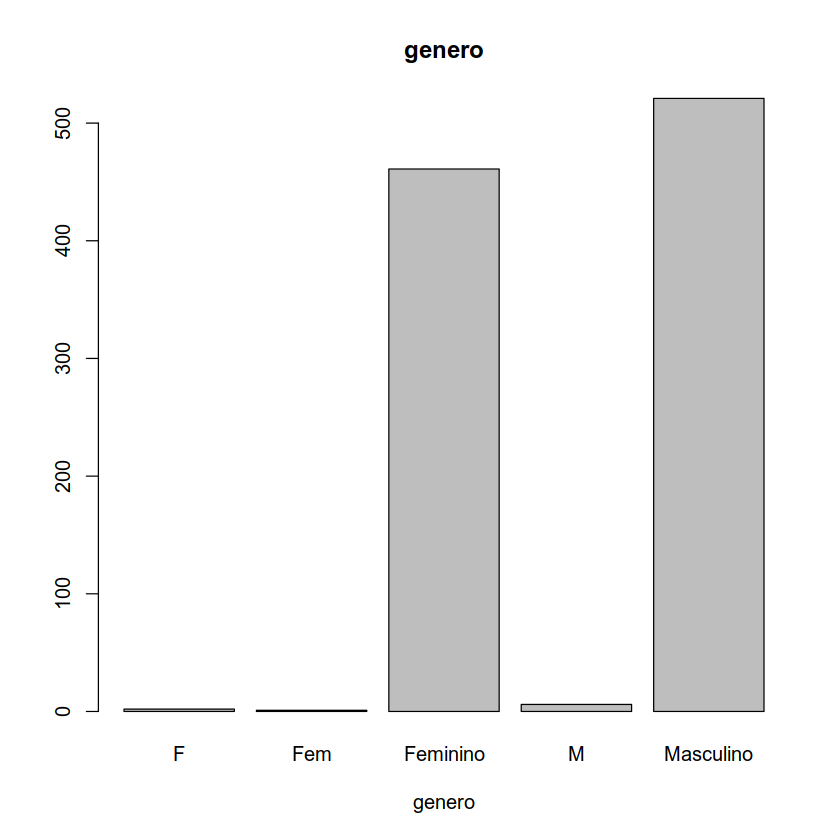

In [44]:
# explorando dados categoricos [genero]
counts <- table(dados$genero)
barplot(counts, main='genero', xlab='genero')

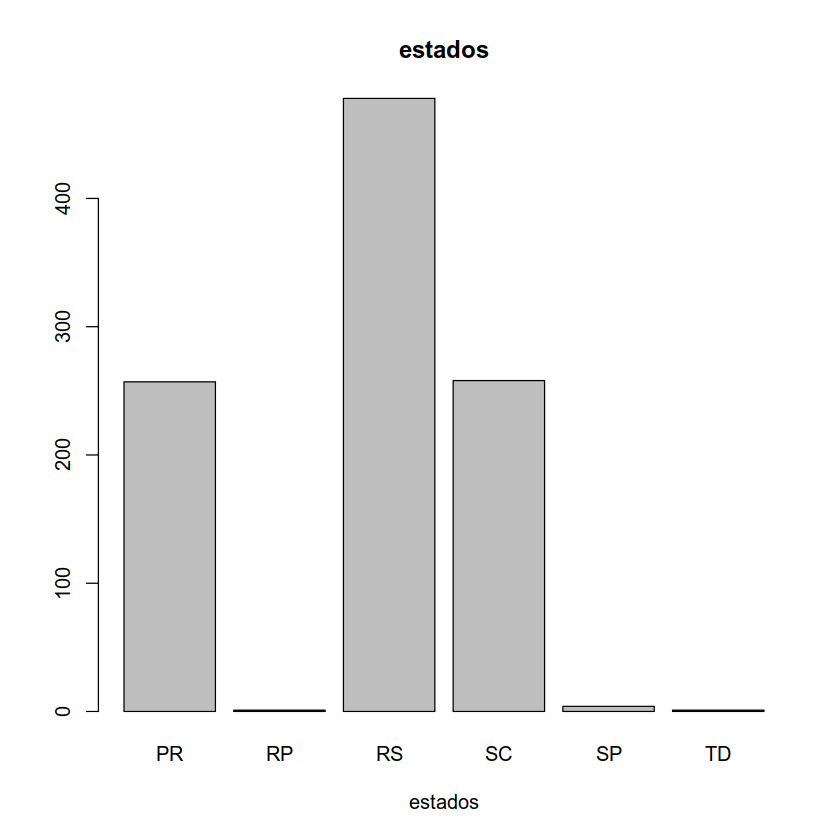

In [45]:
# explorando dados categoricos [estado]
counts <- table(dados$estado)
barplot(counts, main='estados', xlab='estados')

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  376.0   580.0   653.0   648.6   721.0   850.0 

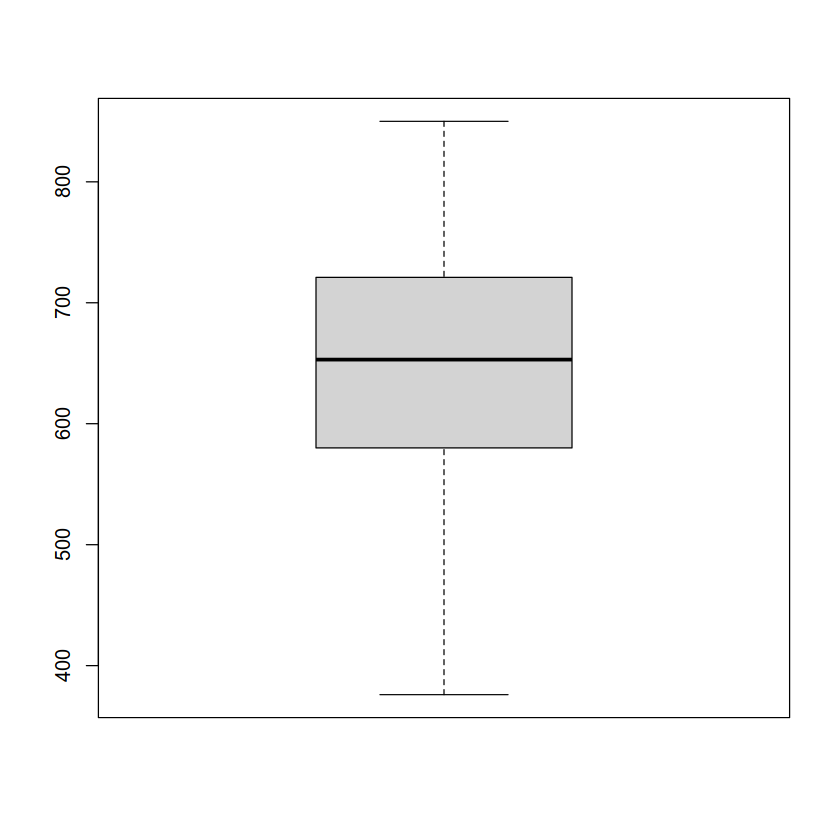

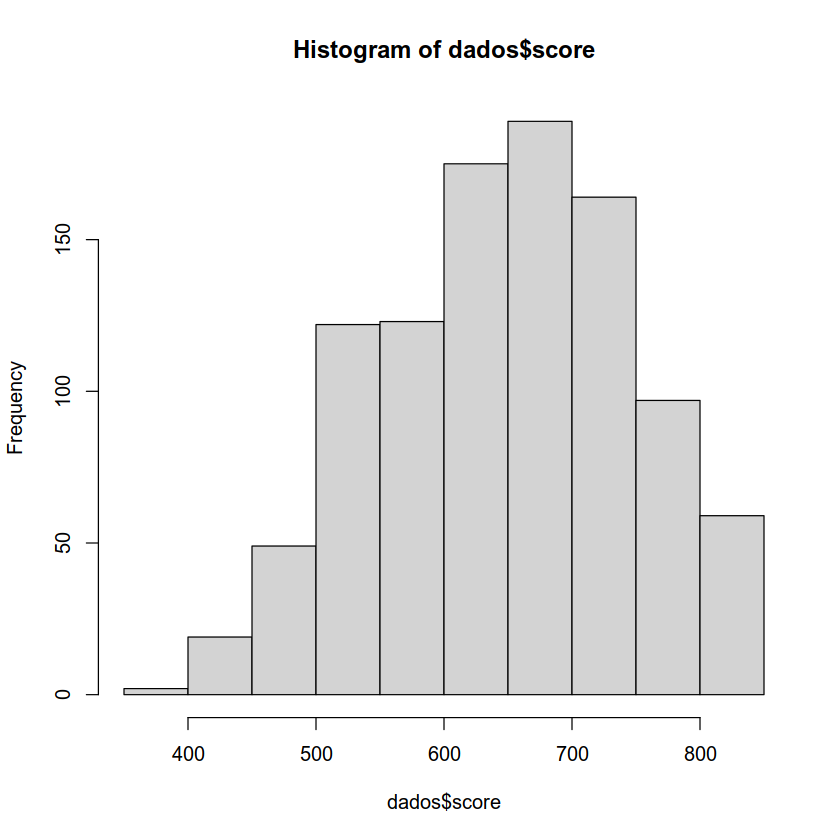

In [46]:
# explorando dados numericos
# score
summary(dados$score)
boxplot(dados$score)
hist(dados$score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -20.0    32.0    37.0    38.9    44.0   140.0 

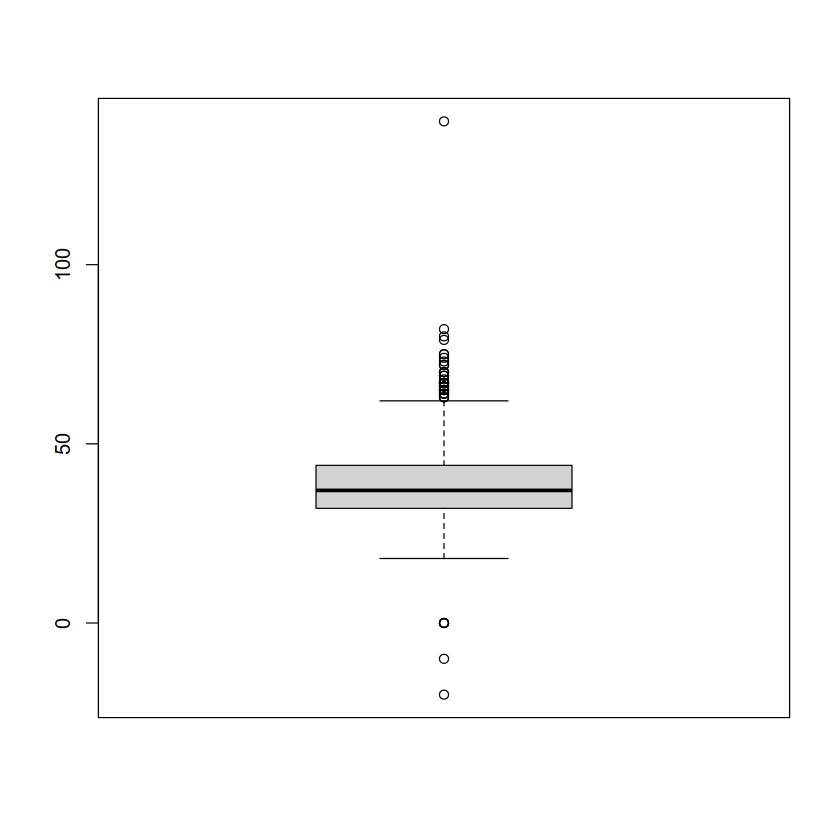

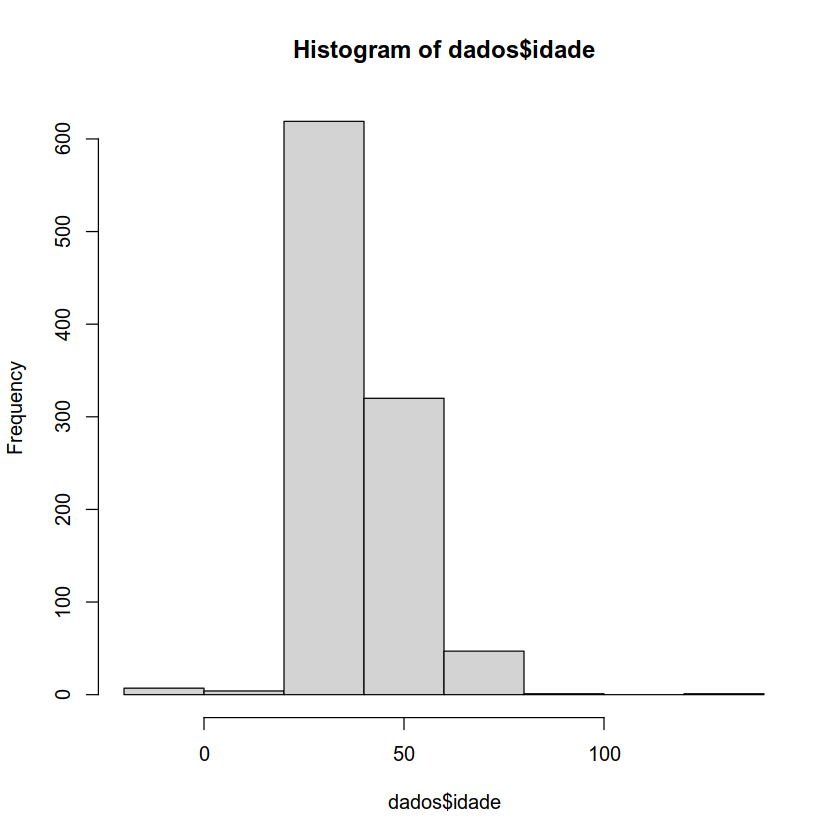

In [47]:
# idade
summary(dados$idade)
boxplot(dados$idade)
hist(dados$idade)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0        0  8958835  7164928 12586844 21177431 

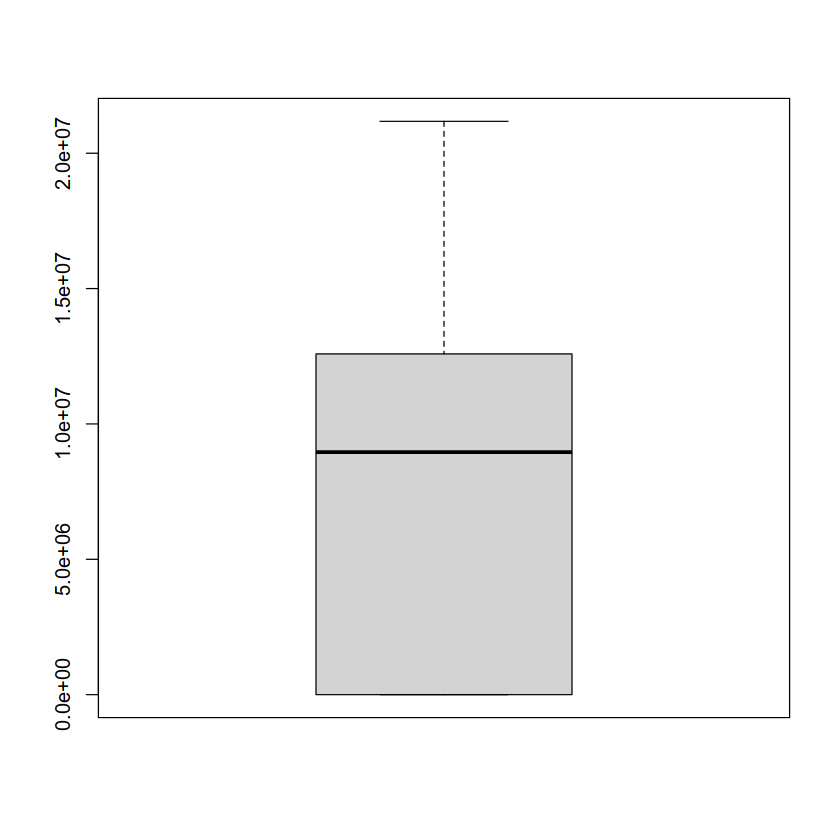

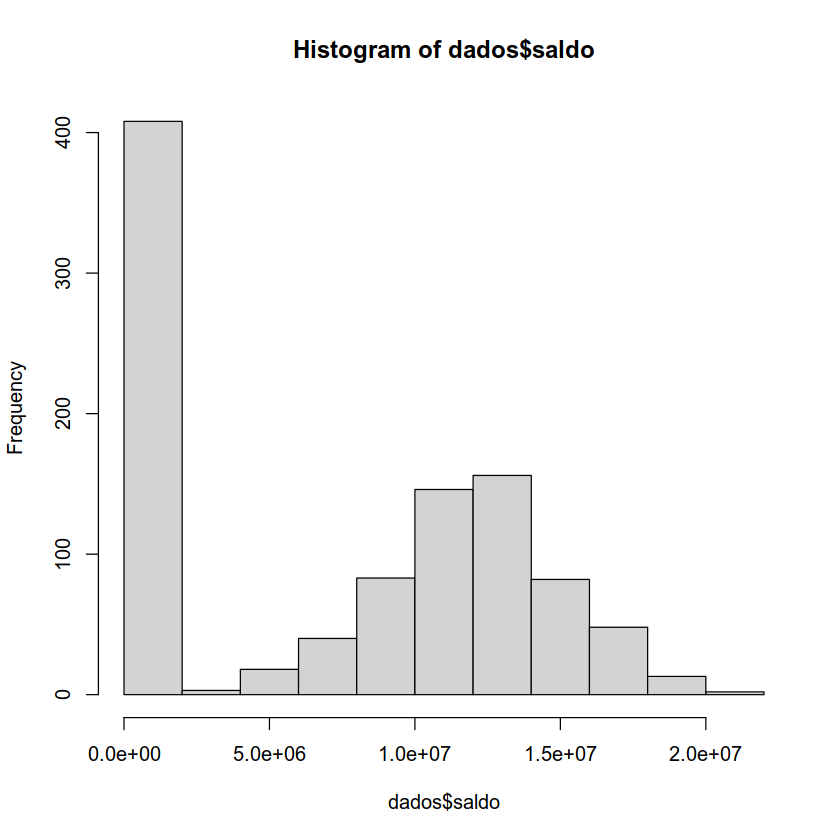

In [48]:
# saldo
summary(dados$saldo)
boxplot(dados$saldo)
hist(dados$saldo)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
9.677e+03 3.029e+06 8.703e+06 3.529e+07 1.405e+07 1.193e+10         7 

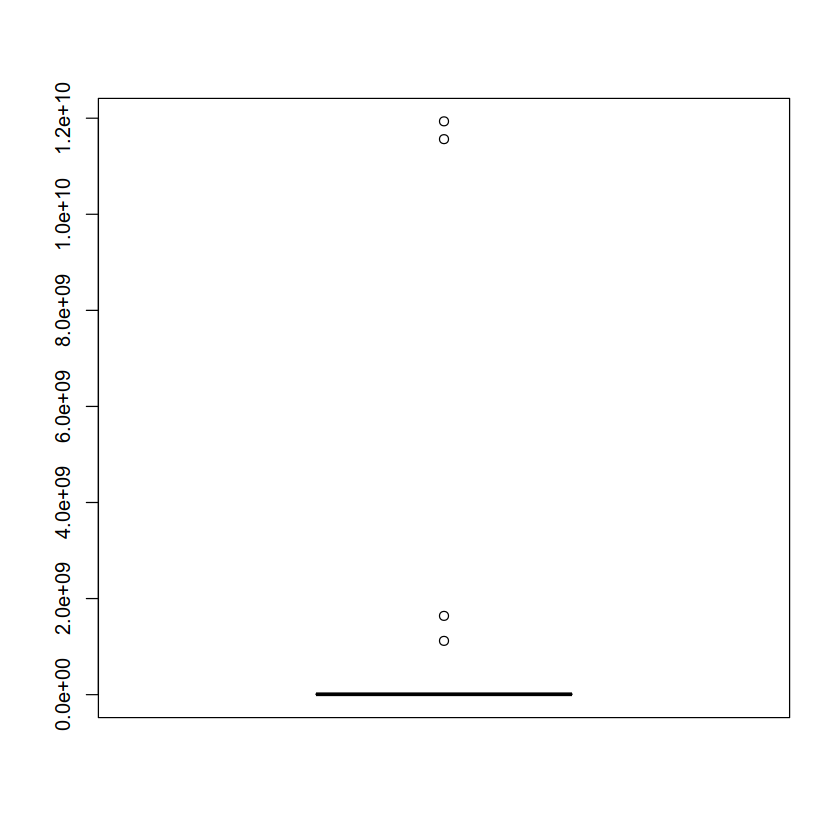

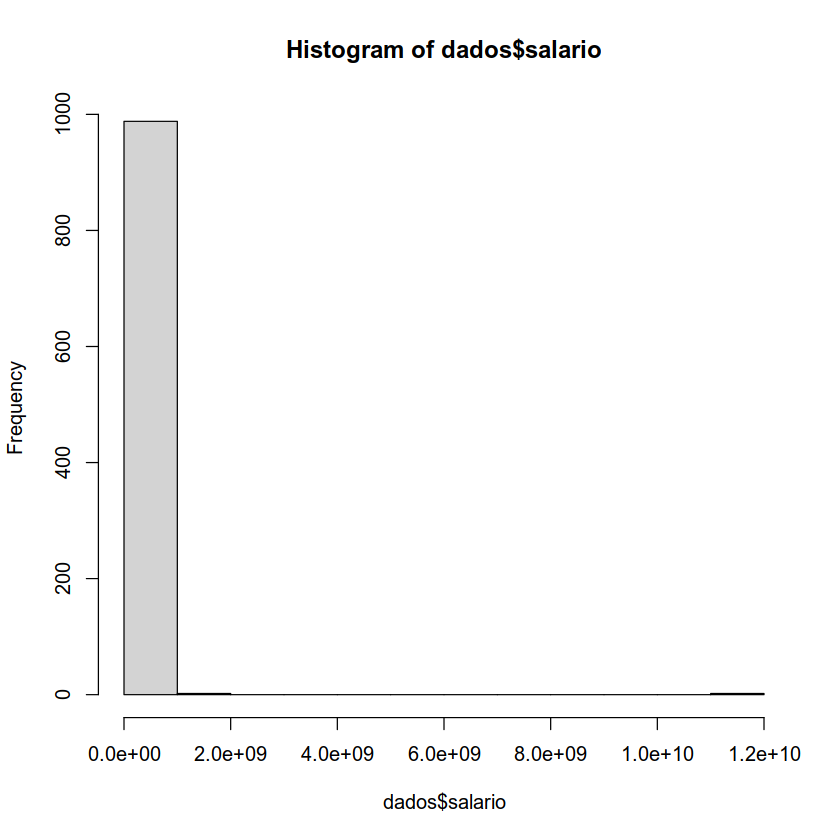

In [49]:
# salario
summary(dados$salario)
boxplot(dados$salario)
hist(dados$salario)

In [50]:
# verificando valores faltantes NAs
dados[!complete.cases(dados),]

# complete.cases busca todas os registros completos, mas com uso da negacao '!' retorna as imcompletas

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu
,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
18,18,549,SC,Feminino,24,9,0,2,1,1,NA,0
53,53,788,RS,Feminino,33,5,0,2,0,0,NA,0
65,65,603,PR,NA,26,4,10916637,1,1,1,9284067,0
85,86,493,RS,NA,46,4,0,2,1,0,190766,0
180,181,754,PR,Feminino,55,3,16160881,1,1,0,NA,1
214,215,676,RS,NA,34,1,6309501,1,1,1,4064581,0
297,298,714,RS,NA,31,4,12516926,1,1,1,10663689,0
331,332,656,RS,Masculino,50,7,0,2,0,1,NA,0
371,372,801,SC,NA,42,4,14194767,1,1,1,1059829,0


In [51]:
# atribuir mediana aos NAs do atributo salario
dados[is.na(dados$salario),]$salario <- median(dados$salario, na.rm=T)

# com 'is.na' foi feito um teste logico em todos registros onde retornar TRUE 
# será atribuido a mediana sem NAs utilizando o parametro 'na.rm=T'

In [52]:
# conferindo alteracoes no atributo salario
dados[!complete.cases(dados$salario),]

id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu
<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>


In [53]:
# pradronizando atributo genero
unique(dados$genero)
summary(dados$genero)

[1] Feminino  Masculino M         <NA>      F         Fem      
Levels: F Fem Feminino M Masculino

F       Fem  Feminino         M Masculino      NA's 
        2         1       461         6       521         8

In [54]:
# transformando 'F' e 'Fem' em Feminino e 'M'e 'NAs' em masculino
dados[is.na(dados$genero) | dados$genero == 'M',]$genero <- 'Masculino'
dados[dados$genero == 'F' | dados$genero == 'Fem',]$genero <- 'Feminino'

# todas os registros do atributo 'genero' sao filtrados os que satisfazerem as 
# condicoes são substituidos os valores conforme a logica, os valores NAs são 
# transformados em 'Masculino' por ser a moda

In [55]:
# conferindo alteracoes no atributo
summary(dados$genero)

F       Fem  Feminino         M Masculino 
        0         0       464         0       535

In [56]:
# removendo levels nao utilizados
dados$genero <- factor(dados$genero)

# conferindo alteracoes 
summary(dados$genero)

Feminino Masculino 
      464       535

In [57]:
# padronizando atributo idade
summary(dados$idade)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -20.0    32.0    37.0    38.9    44.0   140.0 

In [58]:
# idades fora do dominio estabelecido por regra de negocio
dados[dados$idade <= 0 | dados$idade>110,]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu
,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
852,853,667,PR,Feminino,0,1,9713392,2,0,0,11331677,1
868,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028,1
888,889,585,RS,Masculino,0,2,0,2,1,1,1865777,0
931,932,661,SC,Masculino,0,6,13262898,1,0,0,3881267,0
932,933,564,PR,Masculino,0,9,10352275,2,1,1,3433821,0
948,949,715,RS,Feminino,0,5,11859041,1,1,1,568417,1
985,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357,0
991,992,655,RS,Masculino,140,5,93147,2,1,0,6621413,0


In [59]:
# atribuindo mediana para idades fora do dominio
dados[dados$idade <= 0 | dados$idade > 110,]$idade <- median(dados$idade)

# conferindo alteracoes
dados[dados$idade <= 0 | dados$idade>110,]

# os dados sao filtrados e reatribuidos com o valor da mediana 
# com a ausencia de NAs o parametro na.rm=T não foi necessario,

id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu
<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>


In [60]:
# pesquisando dados duplicados pelo id
dados[duplicated(dados$id),]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu
,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
82,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366,0


In [61]:
# removendo dados duplicados pelo indice do atributo id
dados <- dados[-c(82),]

In [62]:
# conferindo alteracoes
dados[duplicated(dados$id),]

id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu
<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>


In [63]:
# visualizando o indice deletado
dados[dados$id == dados[duplicated(dados$id)],]

id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu
<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>


In [64]:
# padronizando atributo estado onde dados estao fora do dominio
summary(dados$estado)
unique(dados$estado)

PR  RP  RS  SC  SP  TD 
257   1 477 258   4   1

[1] RS SC PR RP SP TD
Levels: PR RP RS SC SP TD

In [65]:
# atribuindo moda para dados fora do dominio
dados[!dados$estado %in% c('RS', 'SC', 'PR'),]$estado <- 'RS'

# conferindo alteracoes
summary(dados$estado)
unique(dados$estado)

PR  RP  RS  SC  SP  TD 
257   0 483 258   0   0

[1] RS SC PR
Levels: PR RP RS SC SP TD

In [66]:
# removendo fatores fora do dominio
dados$estado <- factor(dados$estado)

# conferindo alteracoes
summary(dados$estado)

PR  RS  SC 
257 483 258

In [67]:
head(dados)

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu
,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,1,619,RS,Feminino,42,2,0,1,1,1,10134888,1
2,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258,0
3,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157,1
4,4,699,RS,Feminino,39,1,0,2,0,0,9382663,0
5,5,850,SC,Feminino,43,2,12551082,1,1,1,790841,0
6,6,645,SC,Masculino,44,8,11375578,2,1,0,14975671,1


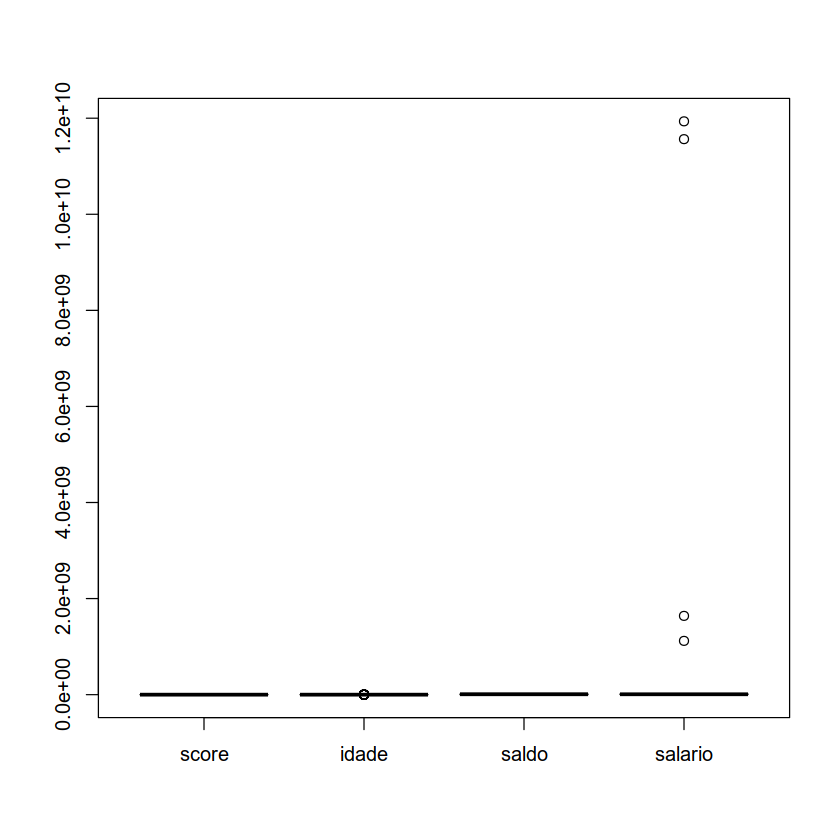

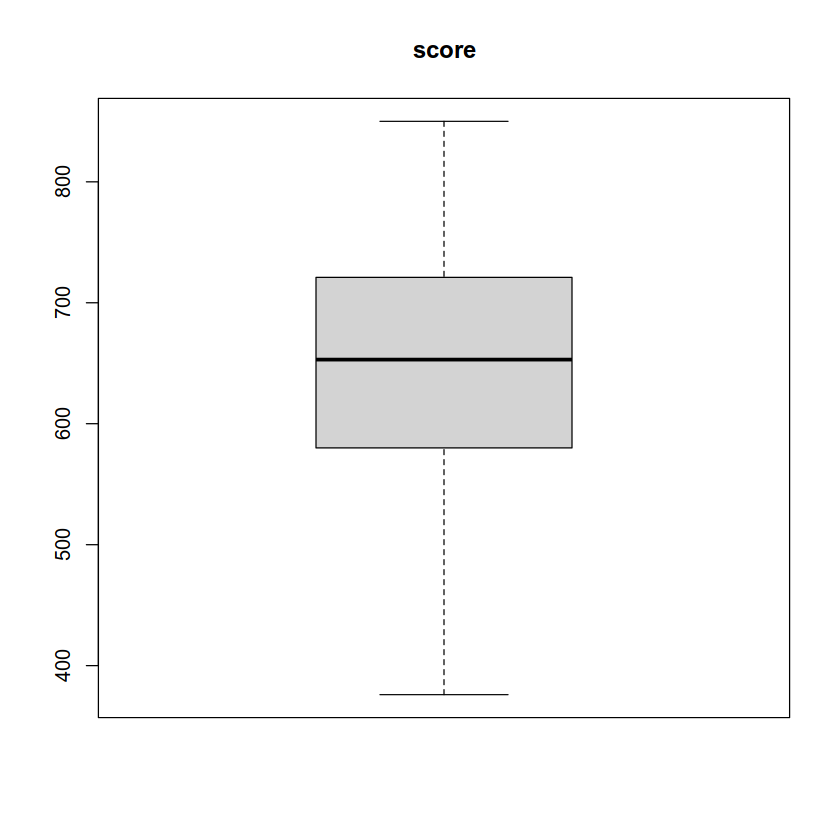

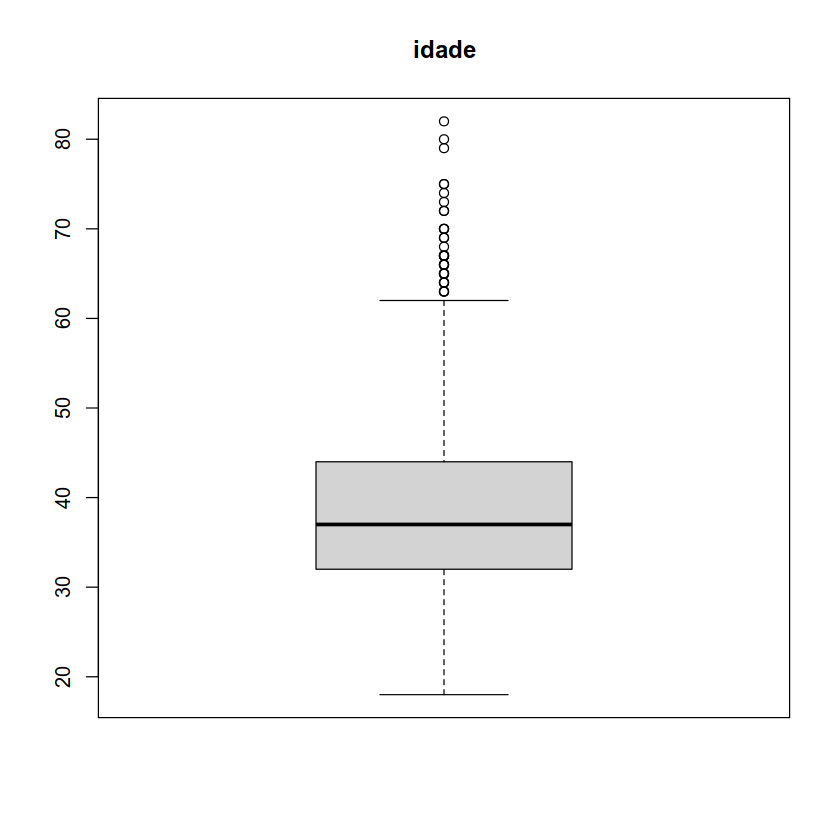

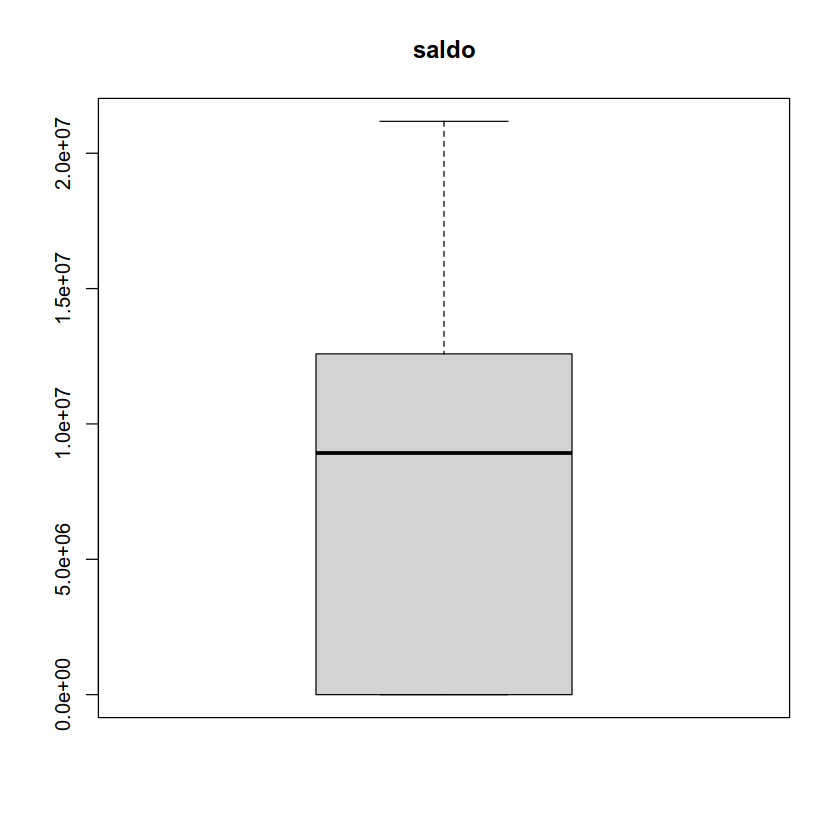

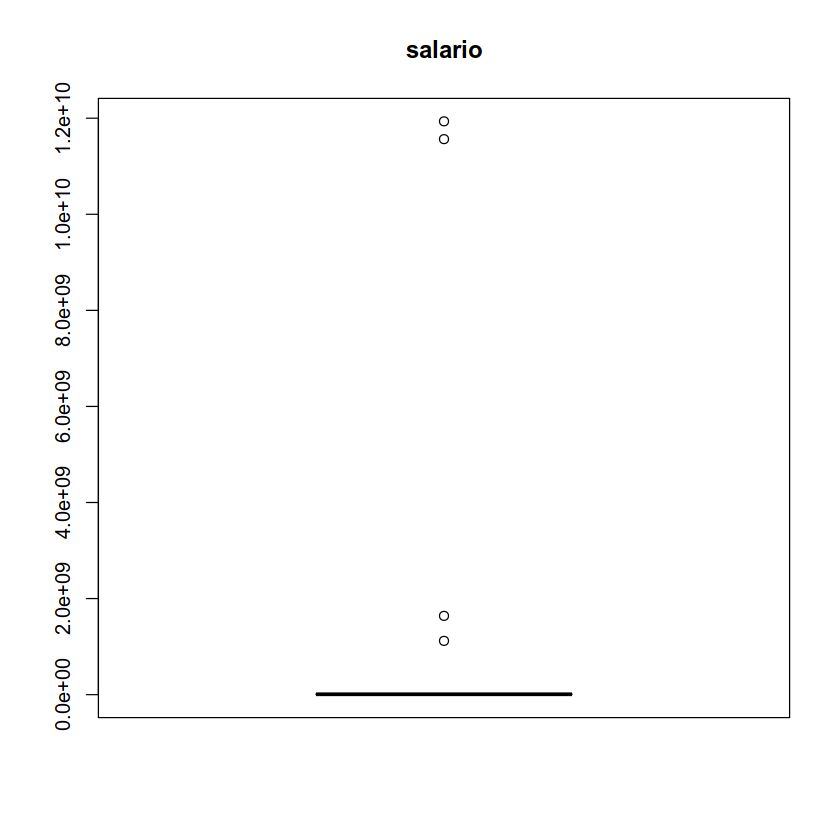

In [70]:
# visualizando outliers
boxplot(dados[, c('score', 'idade', 'saldo', 'salario')])

for (i in c('score', 'idade', 'saldo', 'salario')) {
    boxplot(dados[,i], main = i)
}

In [78]:
# removendo outliers do atributo salario
dados[dados$salario > 2 * sd(dados$salario, na.rm = T),]$salario <- median(dados$salario, na.rm=T)

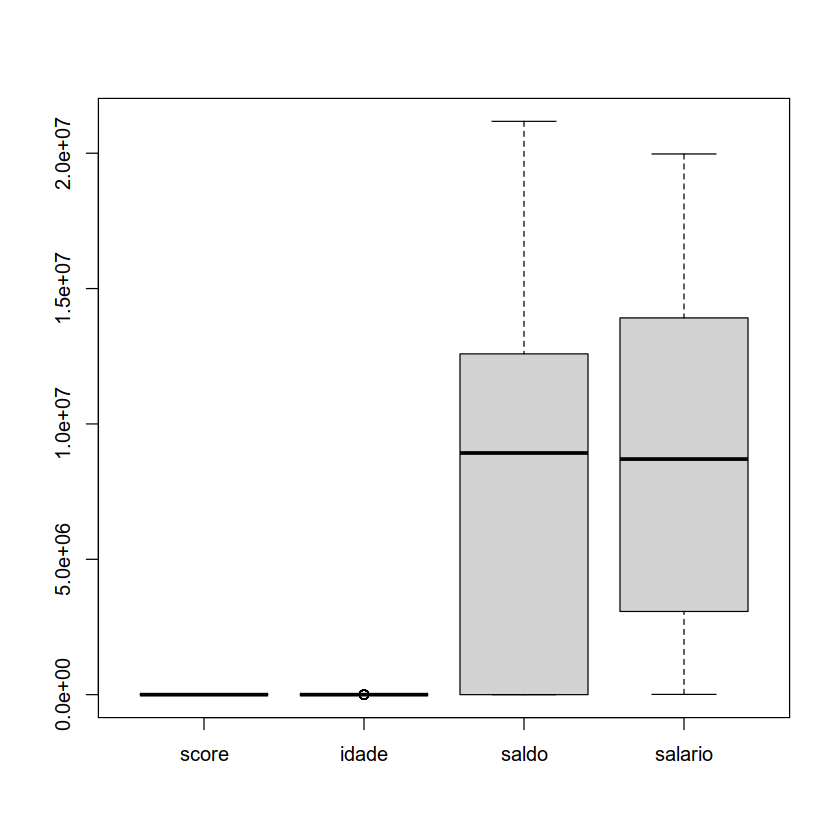

In [79]:
# confirmando alteracoes
boxplot(dados[, c('score', 'idade', 'saldo', 'salario')])